# Node Visualization

Since id_employee and id_last_boss have a hierachical relationship, those relationships can be modeled as graphs, making multiple Directed Acyclic Graphs (DAGs) that can be visualized using NetworkX framework.

## Preparing environment

In [9]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec as n2v
import sys
sys.path.append('../high_performance_employee_resign_prediction')
from utils import paths

## Importing data

In [10]:
train_df = pd.read_csv(paths.data_interim_dir('train_clean.csv'))
test_df = pd.read_csv(paths.data_interim_dir('test_clean.csv'))

In [11]:
target = train_df['resign']
combined_df = pd.concat([train_df.drop('resign', axis=1), test_df]).reset_index(drop=True)

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_employee               4172 non-null   int64  
 1   id_last_boss              4172 non-null   int64  
 2   seniority                 4172 non-null   int64  
 3   work_modality             4172 non-null   object 
 4   office_distance           4172 non-null   float64
 5   low_health_days           4172 non-null   int64  
 6   gender                    4172 non-null   object 
 7   recruitment_channel       4172 non-null   object 
 8   average_permanence        4172 non-null   int64  
 9   salary                    4172 non-null   int64  
 10  performance_score         4172 non-null   int64  
 11  psi_score                 4172 non-null   int64  
 12  marital_estatus           4172 non-null   object 
 13  join_age                  4172 non-null   int64  
 14  join_yea

## Creating graph

In [13]:
G = nx.DiGraph()

In [14]:
# Add edges for employee -> boss
for _, row in combined_df.iterrows():
    G.add_node(row['id_employee'])
    G.add_edge(row['id_employee'], row['id_last_boss'])

## Plotting graph

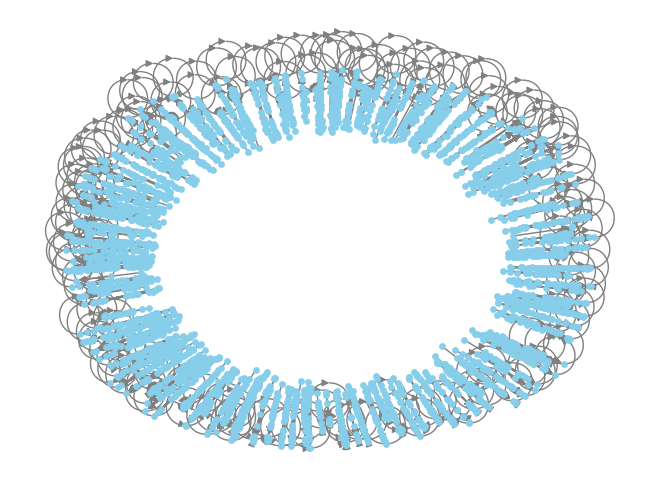

In [15]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=15, edge_color='gray')
plt.show()

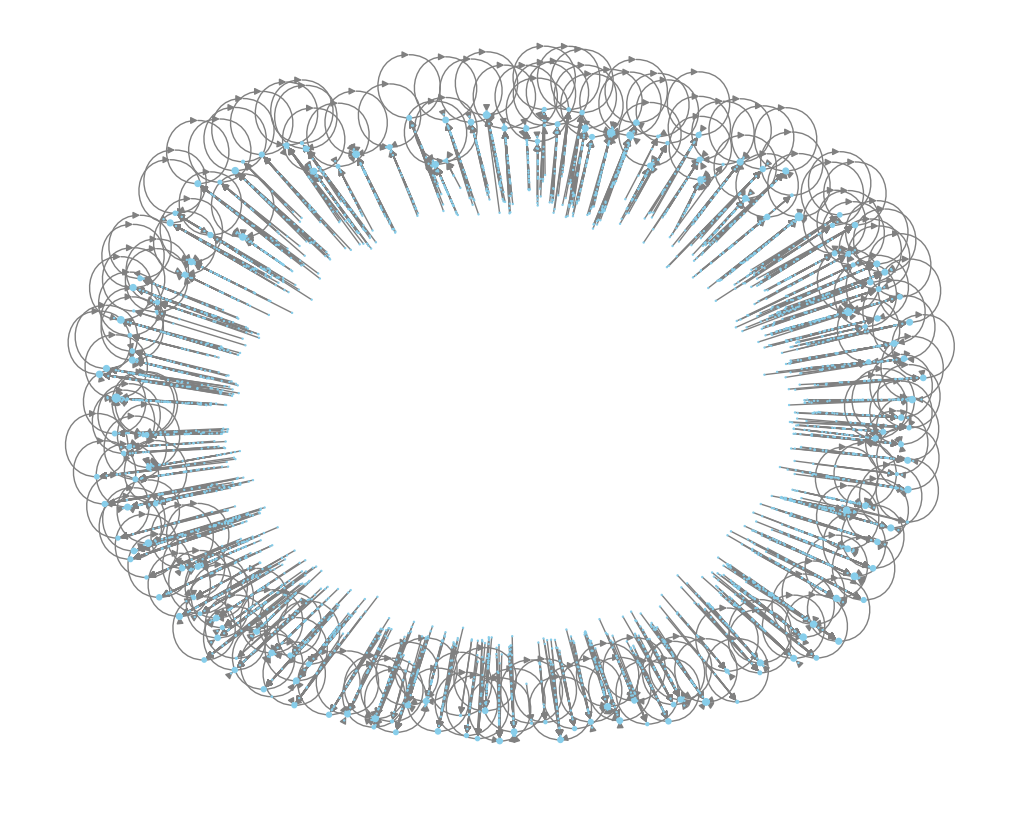

In [16]:
degree_centrality = nx.degree_centrality(G)

# Draw the graph with node size proportional to degree centrality
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
node_size = [v * 2000 for v in degree_centrality.values()]
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=node_size, edge_color='gray')
plt.show()

This is a representation of multiple DAGs formed in the relationship boss-employees. The size of the node depends on the degree of centrality from itself, and those bosses with higher number of employees have a bigger size.